
## Notebook Explanation: Breadth-First Search (BFS) Algorithm for Maze Solving

This notebook showcases an implementation of the Breadth-First Search (BFS) algorithm and the Depth First Search (DFS), a classic uninformed search technique, to solve a maze. The purpose of the notebook is to demonstrate how BFS can be effectively used to navigate through a maze and find the shortest path from a starting point to a goal.


- Uninformed Search:
    BFS is an example of an uninformed search algorithm, meaning it explores the maze without any prior knowledge of the goal's location. Instead, it uses a systematic approach, exploring nodes level by level.

- Breadth-First Search (BFS):
    BFS explores all the neighboring nodes at the present depth before moving on to nodes at the next level of depth.
    It uses a queue data structure (FIFO) to keep track of nodes to visit next, ensuring it examines nodes in the order they are discovered.

*Implementation Steps*

- Maze Representation:
    The maze is represented as a grid (a dictionary where the keys are the coordinates and the items are the states) where each cell can be a wall, an open path, a start point, or a goal.
    Commonly, ' '  may denote open paths, '#' walls, and special markers for start and goal positions.

- BFS Algorithm:
    The BFS starts from the initial position (start point) and explores each neighboring cell (up, down, left, right).
    It checks if the current cell is the goal. If not, it marks the cell as visited and adds its neighbors to the queue.
    The process continues until it reaches the goal or exhausts all possible paths, indicating the goal is unreachable.



### Import the libraries

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 

In [25]:
def load_maze(maze_file):
    maze = []
    with open(maze_file, 'r') as f:
        for line in f:
            maze.append(line.strip())
    
        rows = len(maze[0])
        cols = len(maze)

        return maze, rows, cols

### We load the maze2.txt


In [26]:
maze, rows, cols = load_maze('Mazes/maze2.txt')

In [27]:
# Generate coordinates for the maze
def generate_coordinates(maze,rows, cols):
    maze_dict = {}
    for i in range(cols):
        for j in range(rows):
            maze_dict[(i,j)] = maze[i][j]
    return maze_dict

In [28]:

maze_dict = generate_coordinates(maze,rows, cols)


In [29]:
# Generate the maze image
def generate_maze_image(maze_dict):
    
    max_row = max(maze_dict.keys(), key = lambda x: x[0])[0]+1
    max_col = max(maze_dict.keys(), key = lambda x: x[1])[1]+1

    image = np.zeros((max_row, max_col, 3), dtype = np.uint8)

    colors = {'#': [0,0,0], ' ': [255,255,255], 'S': [0,255,0], 'E': [255,0,0]}

    for (row,col), state in maze_dict.items():
        color = colors.get(state, [255,255,255])
        image[row, col] = color

    plt.imshow(image)
    plt.axis('off')
    plt.title('Maze Visualization')
    plt.show()


## Create the image of the maze2.txt

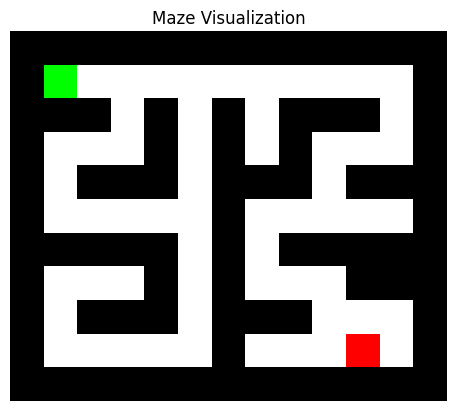

In [30]:
generate_maze_image(maze_dict)

## Create the Agent class

In [31]:
class Agent:
    def __init__(self, maze_dict):
        self.maze_dict = maze_dict
        self.current_position = self.get_position('S')
        self.end_position = self.get_position('E')
    
    def get_position(self, state):
        for position, value in self.maze_dict.items():
            if value == state:
                return position
    
    def get_possible_moves(self, position):
        x, y = position
        moves = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        valid_moves = []
        for move in moves:
            if self.maze_dict.get(tuple(move)) != '#':
                valid_moves.append(move)
        return valid_moves
     
    def bfs(self):
        visited = set()
        queue = [[self.current_position]]
        while queue:
            path = queue.pop(0)
            node = path[-1]
            if node not in visited:
                for move in self.get_possible_moves(node):
                    new_path = list(path)
                    new_path.append(move)
                    queue.append(new_path)
                    if move == self.end_position:
                        return new_path
                visited.add(node)
    def dfs(self):
        visited = set()

        stack =[[self.current_position]]

        while stack:
            path = stack.pop()
            node = path[-1]
            if node not in visited:
                for move in reversed(self.get_possible_moves(node)):
                    new_path = list(path)
                    new_path.append(move)
                    stack.append(new_path)
                    if move == self.end_position:
                        return new_path
                visited.add(node)


In [32]:
agent1 = Agent(maze_dict)
path_bfs = agent1.bfs()
path_bfs.remove(path_bfs[0])
path_bfs.remove(path_bfs[-1])


path_dfs = agent1.dfs()
path_dfs.remove(path_dfs[0])
path_dfs.remove(path_dfs[-1])




In [33]:
# Visualize the path

def Visualize_path(path, maze_dict):
    max_row = max(maze_dict.keys(), key = lambda x: x[0])[0]+1
    max_col = max(maze_dict.keys(), key = lambda x: x[1])[1]+1

    image = np.zeros((max_row, max_col, 3), dtype = np.uint8)

    colors = {'#': [0,0,0], ' ': [255,255,255], 'S': [0,255,0], 'E': [255,0,0], 'X': [0,0,255]}

    for (row,col), state in maze_dict.items():
        color = colors.get(state, [255,255,255])
        image[row, col] = color

    
    for position in path:
        image[position] = colors['X']

    plt.imshow(image)
    plt.axis('off')
    plt.title('Maze Visualization')
    plt.show()
    


## Visualize the bfs path

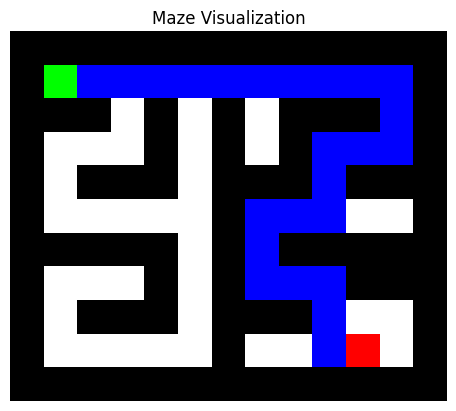

In [34]:
Visualize_path(path_bfs, maze_dict)

## Visualize the dfs path 


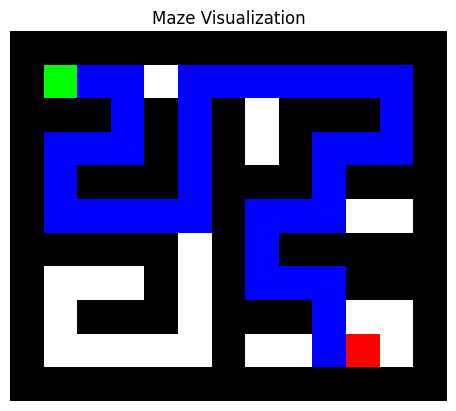

In [35]:
Visualize_path(path_dfs, maze_dict)

## We load maze3.txt


In [36]:
maze, rows, cols = load_maze('Mazes/maze3.txt')
maze_dict = generate_coordinates(maze,rows, cols)
agent2 = Agent(maze_dict)
path_bfs = agent2.bfs()

path_bfs.remove(path_bfs[0])
path_bfs.remove(path_bfs[-1])


path_dfs = agent2.dfs()
path_dfs.remove(path_dfs[0])
path_dfs.remove(path_dfs[-1])




## Visualize the maze3.txt

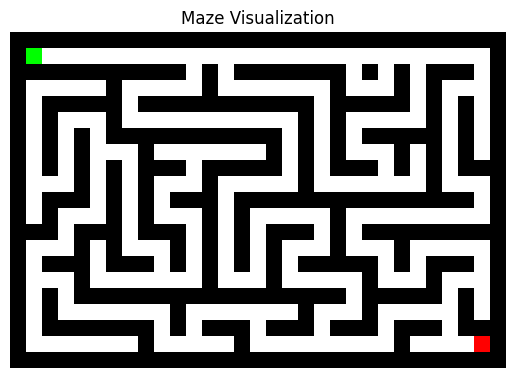

In [37]:
generate_maze_image(maze_dict)

## Visualize the bfs path of the maze3.txt

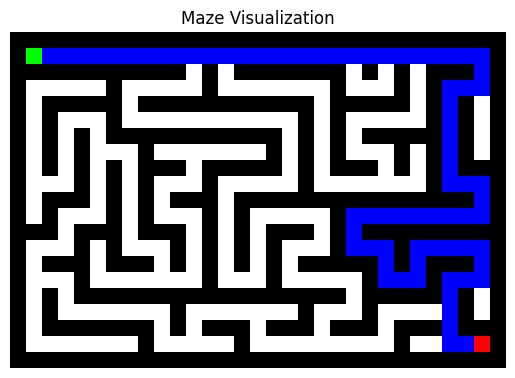

In [38]:
Visualize_path(path_bfs, maze_dict)

## Visualize the dfs path 

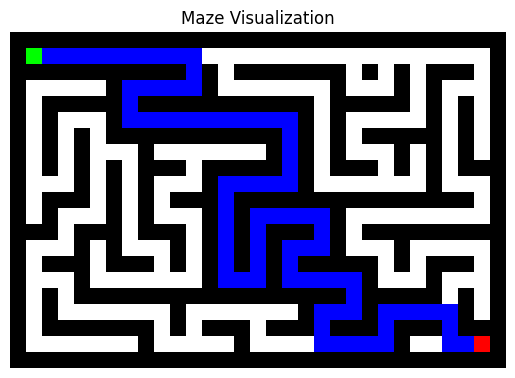

In [39]:
Visualize_path(path_dfs, maze_dict)